وارد کردن کتابخانه های مورد نیاز

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


وارد کردن دیتاست و نمایش بخشی از آن

In [6]:
# Load the dataset
file_path = "C:\\Users\\Rohollah\\Desktop\\ML\\diabetes_prediction_dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


نمایش و تحلیل داده های دیتاست

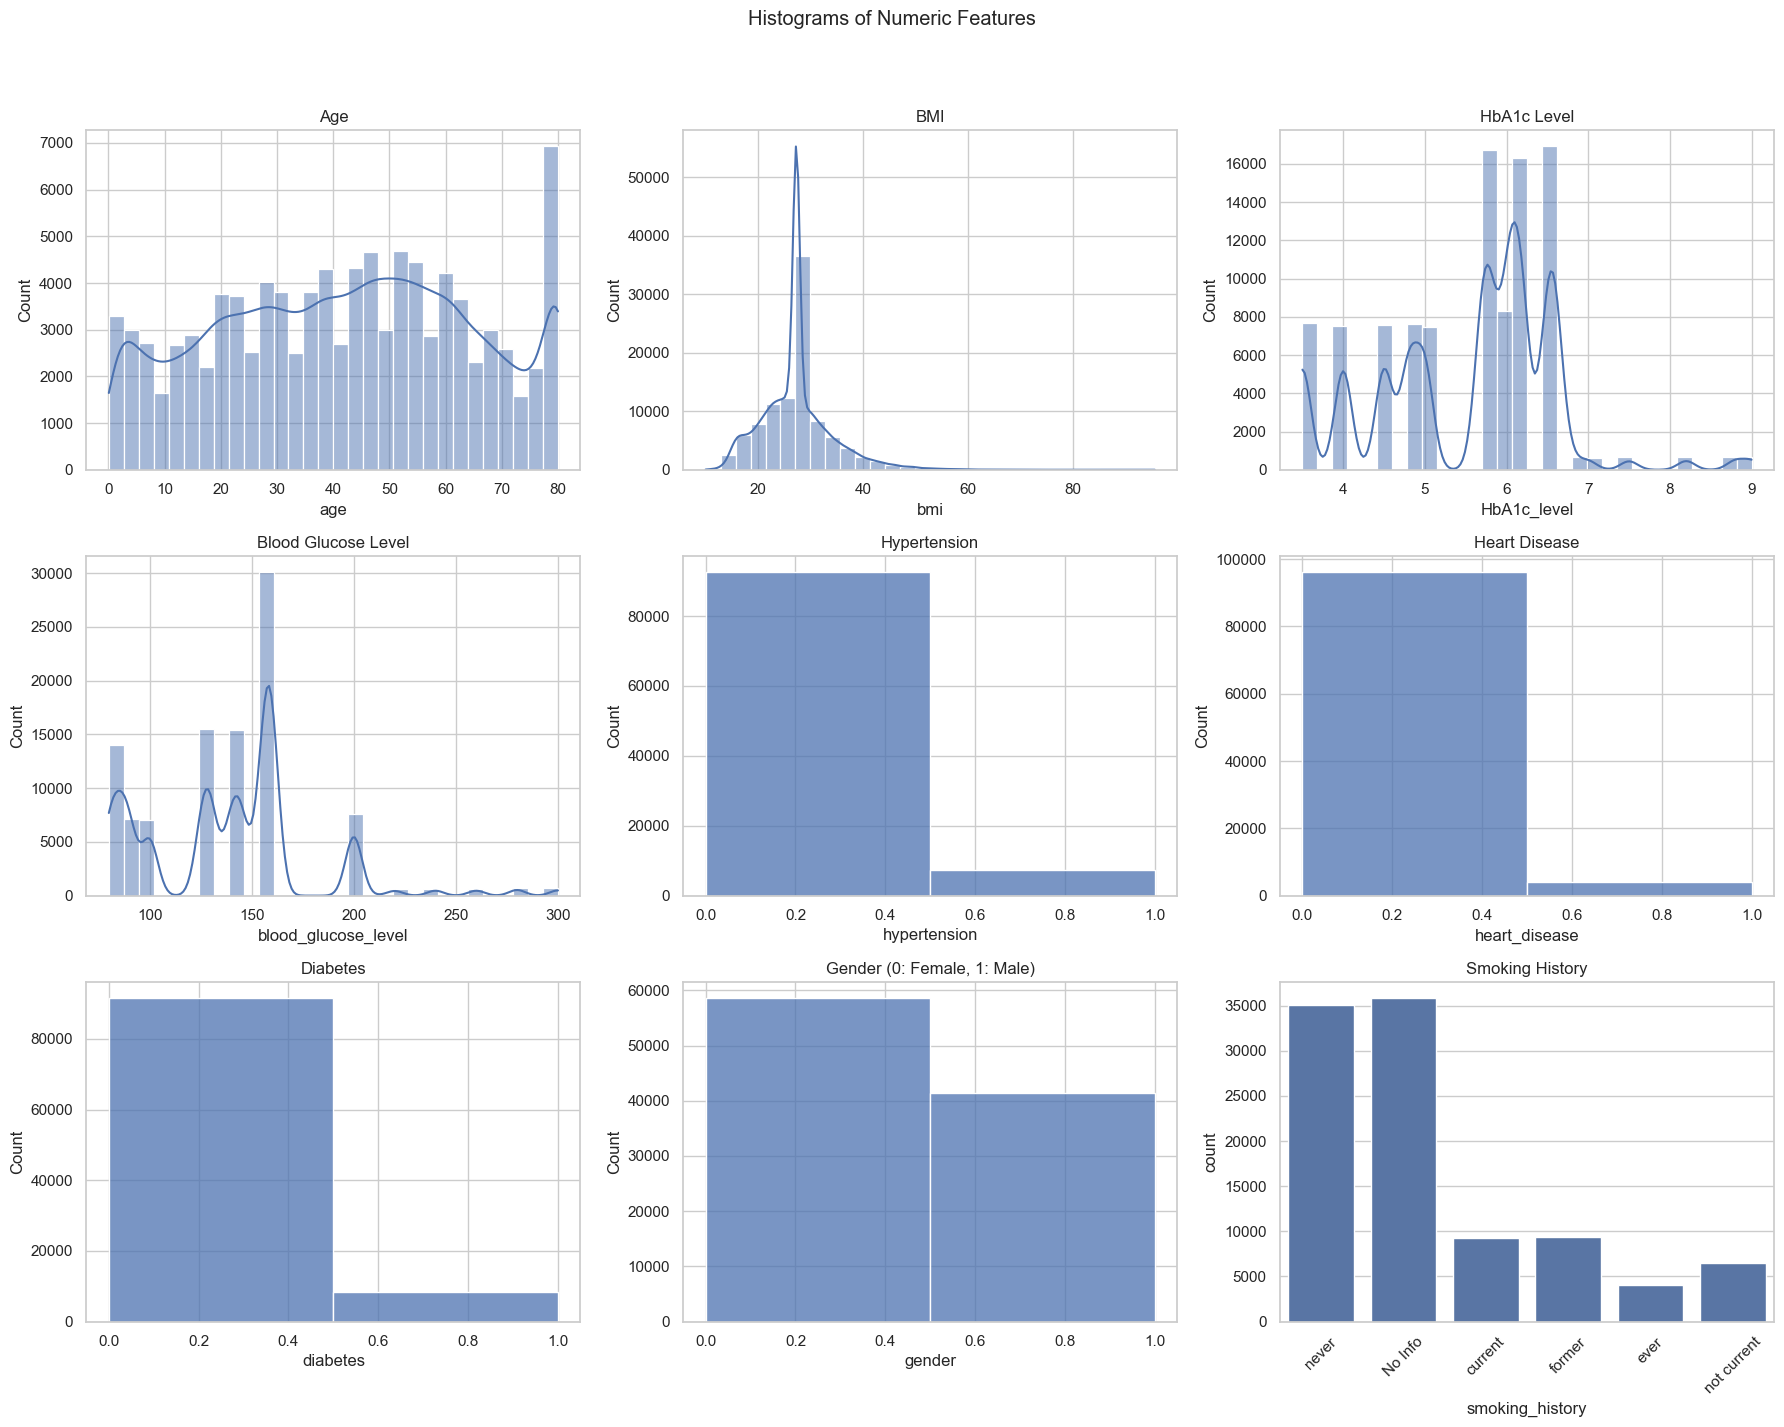

In [7]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create histograms for the numeric features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Histograms of Numeric Features')

# Age
sns.histplot(data['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age')

# BMI
sns.histplot(data['bmi'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI')

# HbA1c level
sns.histplot(data['HbA1c_level'], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('HbA1c Level')

# Blood glucose level
sns.histplot(data['blood_glucose_level'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Blood Glucose Level')

# Hypertension
sns.histplot(data['hypertension'], bins=2, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Hypertension')

# Heart disease
sns.histplot(data['heart_disease'], bins=2, kde=False, ax=axes[1, 2])
axes[1, 2].set_title('Heart Disease')

# Diabetes
sns.histplot(data['diabetes'], bins=2, kde=False, ax=axes[2, 0])
axes[2, 0].set_title('Diabetes')

# Gender (converted to numeric for plotting)
sns.histplot(data['gender'].apply(lambda x: 1 if x == 'Male' else 0), bins=2, kde=False, ax=axes[2, 1])
axes[2, 1].set_title('Gender (0: Female, 1: Male)')

# Smoking history (count plot)
sns.countplot(x='smoking_history', data=data, ax=axes[2, 2])
axes[2, 2].set_title('Smoking History')
plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [11]:
# Encode categorical features
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Male' else 0)
data = pd.get_dummies(data, columns=['smoking_history'], drop_first=True)

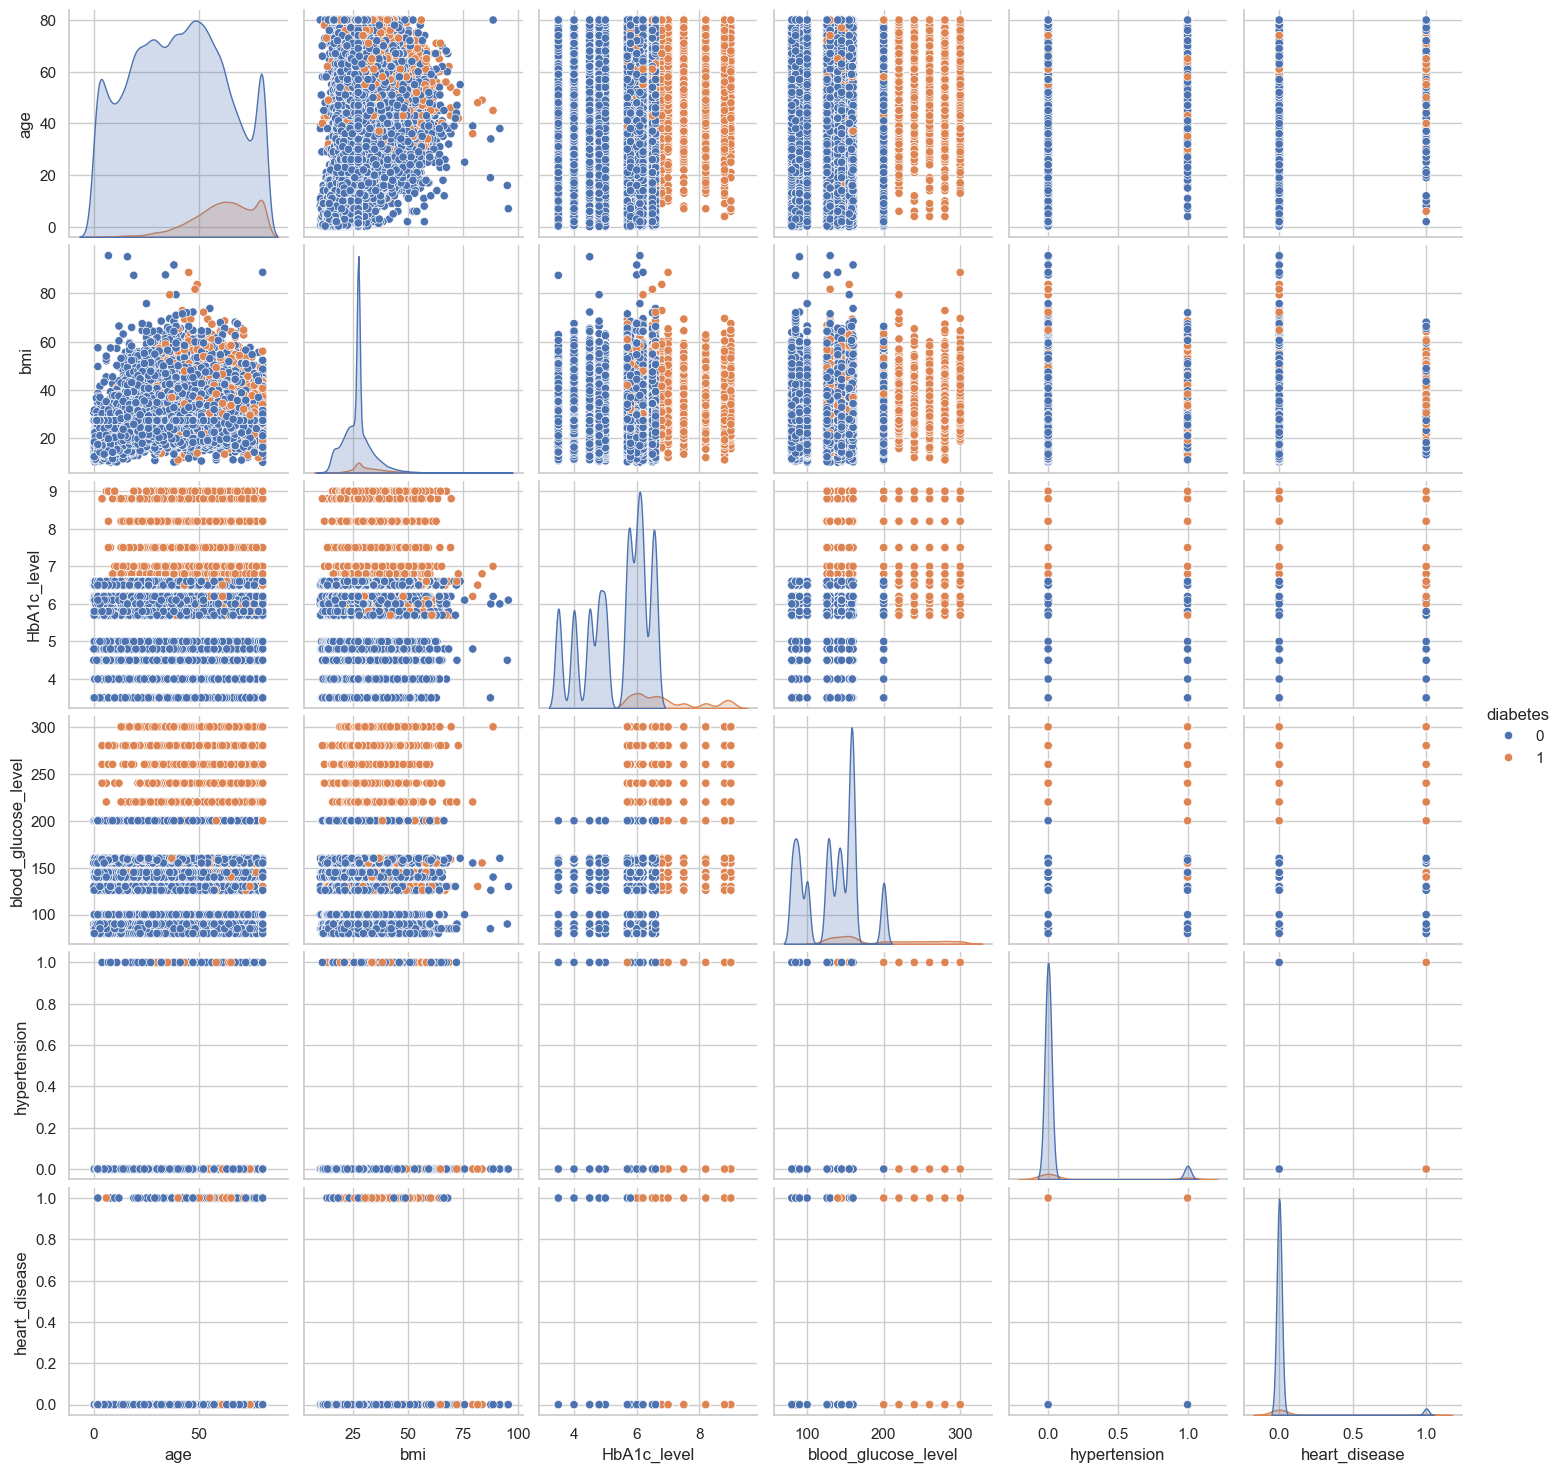

In [14]:
# Pairplot with hue
sns.pairplot(data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'diabetes']], hue='diabetes')
plt.show()

In [15]:
# Separate features and target
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.sample(10)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
55973,0,15.0,0,0,16.56,6.1,90,False,False,False,True,False
5803,1,13.0,0,0,15.38,6.1,160,False,False,False,False,True
70888,0,51.0,0,0,32.36,6.0,158,False,False,False,True,False
73914,0,8.0,0,0,13.65,6.5,155,False,False,False,False,False
9369,0,42.0,0,0,33.51,5.8,130,False,False,False,True,False
79484,0,24.0,0,0,35.97,6.0,155,True,False,False,False,False
49909,0,21.0,0,0,27.32,6.5,90,False,False,False,False,False
36122,0,80.0,1,0,28.16,4.5,80,False,False,False,False,False
65930,0,6.0,0,0,18.60,5.8,130,False,False,False,False,False
51986,0,18.0,0,0,18.65,6.5,85,False,False,False,False,True


In [22]:
X_train.shape

(80000, 12)

In [23]:
X_test.shape

(20000, 12)

In [24]:
y_train.shape

(80000,)

In [35]:
y_train.sample(10)

54935    0
35713    0
37495    0
49877    0
37848    1
86379    0
27292    0
33296    0
86295    0
44782    1
Name: diabetes, dtype: int64

In [25]:
y_test.shape

(20000,)

In [26]:
# Initialize the models
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

In [27]:
# Dictionary to store the evaluation results
results = {}

In [28]:
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True)
    matrix = confusion_matrix(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        "classification_report": report,
        "confusion_matrix": matrix
    }

In [33]:
# Print the results
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print("\nClassification Report:")
    print(pd.DataFrame(result["classification_report"]).transpose())
    print("\nConfusion Matrix:")
    print(result["confusion_matrix"])
    print("\n")


Model: SVM

Classification Report:
              precision    recall  f1-score     support
0              0.945030  1.000000  0.971738  18292.0000
1              1.000000  0.377049  0.547619   1708.0000
accuracy       0.946800  0.946800  0.946800      0.9468
macro avg      0.972515  0.688525  0.759679  20000.0000
weighted avg   0.949724  0.946800  0.935518  20000.0000

Confusion Matrix:
[[18292     0]
 [ 1064   644]]



Model: KNN

Classification Report:
              precision    recall  f1-score      support
0              0.957800  0.993877  0.975505  18292.00000
1              0.890088  0.531030  0.665200   1708.00000
accuracy       0.954350  0.954350  0.954350      0.95435
macro avg      0.923944  0.762454  0.820352  20000.00000
weighted avg   0.952017  0.954350  0.949005  20000.00000

Confusion Matrix:
[[18180   112]
 [  801   907]]



Model: Random Forest

Classification Report:
              precision    recall  f1-score     support
0              0.971633  0.996173  0.983750 